<a href="https://colab.research.google.com/github/gharis/NLP/blob/master/SPAM_MESSAGE_CLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/laxmimerit/All-CSV-ML-Data-Files-Download.git

fatal: destination path 'All-CSV-ML-Data-Files-Download' already exists and is not an empty directory.


In [0]:
df= pd.read_csv('/content/All-CSV-ML-Data-Files-Download/spam.tsv', sep = '\t')

In [7]:
 df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [8]:
df.isnull().sum() #check if null values in data set

label      0
message    0
length     0
punct      0
dtype: int64

In [9]:
len(df)

5572

In [10]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [11]:
#balancing data
ham = df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [12]:
spam = df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [13]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [14]:
ham = ham.sample(spam.shape[0])
ham.shape,spam.shape

((747, 4), (747, 4))

In [15]:
data = ham.append(spam, ignore_index=True)
data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


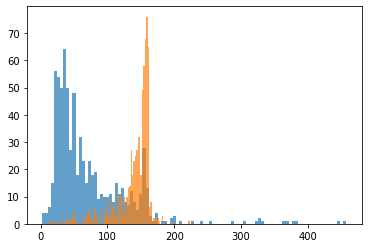

In [16]:
#analysis data length
plt.hist(data[data['label']=='ham']['length'], bins = 100, alpha =0.7)
plt.hist(data[data['label']=='spam']['length'], bins = 100, alpha =0.7)
plt.show()

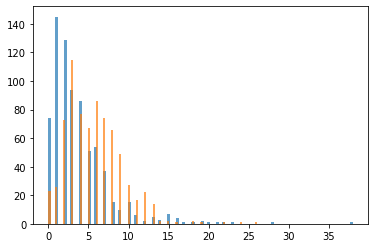

In [17]:
#analysis data punct
plt.hist(data[data['label']=='ham']['punct'], bins = 100, alpha =0.7)
plt.hist(data[data['label']=='spam']['punct'], bins = 100, alpha =0.7)
plt.show() 

In [0]:
#prepocess data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
data.head()

,label,message,length,punct
0,ham,i am going to bed now prin,26,0
1,ham,Yes but I don't care cause I know its there!,44,2
2,ham,Dude while were makin those weirdy brownies my...,88,2
3,ham,Aight what time you want me to come up?,39,1
4,ham,I will treasure every moment we spend together...,49,3


In [0]:
x_train, x_test, y_train, y_test = train_test_split(data['message'],data['label'], test_size = 0.3 ,random_state = 0, shuffle = True , stratify = data ['label'])

In [22]:
x_train,y_train

(1128    U’ve Bin Awarded £50 to Play 4 Instant Cash. C...
 742     Dunno da next show aft 6 is 850. Toa payoh got...
 477          I was gonna ask you lol but i think its at 7
 542     I'm sorry. I've joined the league of people th...
 1277    Ringtone Club: Gr8 new polys direct to your mo...
                               ...                        
 1211    Bloomberg -Message center +447797706009 Why wa...
 312     House-Maid is the murderer, coz the man was mu...
 268     I called and said all to him:)then he have to ...
 272     I want to show you the world, princess :) how ...
 1222    Text BANNEDUK to 89555 to see! cost 150p texto...
 Name: message, Length: 1045, dtype: object, 1128    spam
 742      ham
 477      ham
 542      ham
 1277    spam
         ... 
 1211    spam
 312      ham
 268      ham
 272      ham
 1222    spam
 Name: label, Length: 1045, dtype: object)

In [0]:
vectorizer = TfidfVectorizer()

In [0]:
x_train = vectorizer.fit_transform(x_train)  

In [25]:
x_train.shape

(1045, 3708)

In [26]:
x_train

<1045x3708 sparse matrix of type '<class 'numpy.float64'>'
	with 17792 stored elements in Compressed Sparse Row format>

In [0]:
clf = Pipeline([('tfidf', TfidfVectorizer()),('clf', RandomForestClassifier(n_estimators=100, n_jobs= -1))])

In [30]:
clf.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [0]:
y_pred = clf.predict(x_test)

In [32]:
confusion_matrix(y_test, y_pred)

array([[225,   0],
       [ 26, 198]])

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.90      1.00      0.95       225
        spam       1.00      0.88      0.94       224

    accuracy                           0.94       449
   macro avg       0.95      0.94      0.94       449
weighted avg       0.95      0.94      0.94       449



In [34]:
accuracy_score(y_test, y_pred)

0.9420935412026726

In [37]:
clf.predict(["Hey good morning"])

array(['ham'], dtype=object)

In [36]:
clf.predict(["congratulations! you have won free one million dollars, TEXT 'WON' to 4498224"])

array(['spam'], dtype=object)

In [0]:
#SVM

In [0]:
clf = Pipeline([('tfidf', TfidfVectorizer()),('clf', SVC(C=1000, gamma= 'auto'))])

In [39]:
clf.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=1000, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_fun

In [0]:
y_pred = clf.predict(x_test)

In [41]:
confusion_matrix(y_test, y_pred)

array([[223,   2],
       [ 19, 205]])

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.99      0.96       225
        spam       0.99      0.92      0.95       224

    accuracy                           0.95       449
   macro avg       0.96      0.95      0.95       449
weighted avg       0.96      0.95      0.95       449



In [43]:
accuracy_score(y_test, y_pred)

0.9532293986636972

In [44]:
clf.predict(["Hey good morning"])

array(['ham'], dtype=object)

In [45]:
clf.predict(["email login detials to jrizfwdfpyrifgvs@yahoo.com and recover facebook account"])

array(['spam'], dtype=object)